In [ ]:
max_diff=int(input('Enter the Tolerable Differnce: '))
print('Enter the Bandwidths')
arr=list(map(float,input().split()))
arr.sort()
i=0;j=0;group=1

while 1:

    if arr[i]<=arr[j]+max_diff:
        print(arr[i],end='  ')
        print('Group: ',group)
        i=i+1
    else:
        j=i
        group+=1
    
    if i==len(arr):
        break

In [ ]:
max_diff=int(input('Enter the Tolerable Differnce: '))
print('Enter the Bandwidths(in Kbps)')
arr=list(map(int,input().split()))
arr.sort()
i=0;j=1;group=1;count=0

for i in range(len(arr)):
    print(arr[i],end='  ')
    print('Group: ',group)
    if j!=len(arr) and arr[j]-arr[i]>max_diff:
        group+=1
    j+=1

#Wrong as it's no longer a cluster!

In [2]:
#Using KMeans Clustering

import numpy as np
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

# Step 1: Collect data on network speeds/bandwidths of all users
# speeds = np.array([...])  # Array of network speeds/bandwidths
print('Enter the Bandwidths')
arr=list(map(int,input().split()))
speeds=np.array(arr)

# Step 2: Initialize number of clusters
min_transfers = 1  # Minimum number of transfers sender can handle
max_transfers = 3  # Maximum number of transfers sender can handle
k = min(max(len(speeds) // max_transfers, 1), len(speeds) // min_transfers)  # Compute number of clusters
print('K Value is: ',k)

# Steps 3-4: Normalize and cluster data
X = (speeds - np.mean(speeds)) / np.std(speeds)  # Normalize data
print('\n\nNormalized Cluster:')
print(X)
#print('X Reshapes:\n',X.reshape(-1, 1))

kmeans = KMeans(n_clusters=k).fit(X.reshape(-1, 1))  # Apply KMeans clustering

# Step 5: Assign users to nearest cluster
labels = kmeans.predict(X.reshape(-1, 1))  # Assign labels to each data point

print('\nLabels:')
labels=np.sort(labels)
print(np.sort(labels))

# Step 6: Calculate average network speed/bandwidth for each cluster
cluster_speeds = np.zeros(k)
for i in range(k):
    cluster_speeds[i] = np.mean(X[labels == i] * np.std(speeds) + np.mean(speeds))
    
print('\n\n\nCluster Speeds:\n',cluster_speeds)



#Note that the total number of clusters is inversily proportional to the Maximum Transfers Allowed.
#More the transfers tolerated by the device, the lesser grouping of data will be present


Enter the Bandwidths
19 29 39 49 59 69 79 80 90 100
K Value is:  3


Normalized Cluster:
[-1.65531424 -1.263987   -0.87265975 -0.48133251 -0.09000527  0.30132198
  0.69264922  0.73178195  1.12310919  1.51443643]

Labels:
[0 0 0 0 1 1 1 2 2 2]



Cluster Speeds:
 [34. 69. 90.]


In [5]:
from sklearn.cluster import KMeans

# Set up user speeds
speeds = [10, 15, 20, 30, 35, 40, 50, 55, 60, 70, 75, 80, 90, 100]

# Set up KMeans clustering with 3 clusters
n_clusters = 3
max_transfers = 2
min_transfers = 1
k = min(max(len(speeds) // max_transfers, 1), len(speeds) // min_transfers)
kmeans = KMeans(n_clusters=k, random_state=0).fit([[x] for x in speeds])

# Get cluster assignments
Labels = list(kmeans.labels_)

# Get optimized data transfer plan
groups = [Labels[i:i+k] for i in range(0, len(speeds), k)]
plan = []
for i in range(max_transfers):
    transfer = []
    for group in groups:
        if len(group) > i:
            transfer.extend([speeds[j] for j, label in enumerate(group) if label == group[i]])
    plan.append(transfer)

# Print results
print(f"User speeds: {speeds}")
print(f"\nNumber of clusters: {n_clusters}")
print(f"\nCluster assignments: {Labels}")
print("\nOptimized data transfer plan:")
for i, transfer in enumerate(plan):
    print(f"Transfer {i+1}: {transfer}")


User speeds: [10, 15, 20, 30, 35, 40, 50, 55, 60, 70, 75, 80, 90, 100]

Number of clusters: 3

Cluster assignments: [1, 1, 1, 5, 2, 2, 4, 4, 4, 0, 0, 0, 6, 3]

Optimized data transfer plan:
Transfer 1: [10, 15, 20, 10, 15]
Transfer 2: [10, 15, 20, 10, 15]


[[18.75]
 [83.  ]
 [48.  ]]
[0 0 0 0 2 2 2 2 2 1 1 1 1 1]


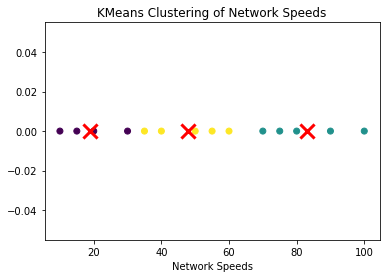

In [7]:
#Plotting the graph

import matplotlib.pyplot as plt
import numpy as np

# Set up user speeds
speeds = [10, 15, 20, 30, 35, 40, 50, 55, 60, 70, 75, 80, 90, 100]

# Set up KMeans clustering with 3 clusters
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit([[x] for x in speeds])

# Get cluster centers and assignments
centers = kmeans.cluster_centers_
print(centers)
labels = kmeans.labels_
print(labels)

# Plot data points and cluster centers
fig, ax = plt.subplots()
ax.scatter(speeds, np.zeros_like(speeds), c=labels)
ax.scatter(centers, np.zeros_like(centers), marker='x', s=200, linewidths=3, color='r')
ax.set_xlabel('Network Speeds')
ax.set_title('KMeans Clustering of Network Speeds')

# Show plot
plt.show()

In [11]:
sample_string = None
result = sample_string.split()
print(result)

AttributeError: 'NoneType' object has no attribute 'split'

In [8]:
import numpy as np
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

# Step 1: Collect data on network speeds/bandwidths of all users
# speeds = np.array([...])  # Array of network speeds/bandwidths
print('Enter the Bandwidths')
arr=list(map(int,input().split()))
speeds=np.array(arr)

# Step 2: Initialize number of clusters
min_transfers = 1  # Minimum number of transfers sender can handle
max_transfers = 5  # Maximum number of transfers sender can handle
k = min(max(len(speeds) // max_transfers, 1), len(speeds) // min_transfers)  # Compute number of clusters
print('K Value is: ',k)

# Steps 3-4: Normalize and cluster data
X = (speeds - np.mean(speeds)) / np.std(speeds)  # Normalize data
print('\n\nNormalized Cluster:')
print(X)

kmeans = KMeans(n_clusters=k).fit(X.reshape(-1, 1))  # Apply KMeans clustering

# Step 5: Assign users to nearest cluster
labels = kmeans.predict(X.reshape(-1, 1))  # Assign labels to each data point

print('\nLabels:')
labels=np.sort(labels)
print(np.sort(labels))


Enter the Bandwidths
10 20 30 40 50 60 70 80 90 100 110 120 130
K Value is:  2


Normalized Cluster:
[-1.60356745 -1.33630621 -1.06904497 -0.80178373 -0.53452248 -0.26726124
  0.          0.26726124  0.53452248  0.80178373  1.06904497  1.33630621
  1.60356745]

Labels:
[0 0 0 0 0 0 0 1 1 1 1 1 1]


In [3]:
#Using KMeans Clustering

import numpy as np
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

# Step 1: Collect data on network speeds/bandwidths of all users
# Array of network speeds/bandwidths

print('Enter the Bandwidths')
arr=list(map(int,input().split()))
arr.sort()
speeds=np.array(arr)

# Step 2: Initialize number of clusters

min_transfers = 1  # Minimum number of transfers sender can handle
max_transfers = 3  # Maximum number of transfers sender can handle (Based on Cloud Service Provider's RAM Specs)
k = min(max(len(speeds) // max_transfers, 1), len(speeds) // min_transfers)  # Compute number of clusters
print('K Value is: ',k)

# Steps 3-4: Normalize and cluster data

X = (speeds - np.mean(speeds)) / np.std(speeds)  # Normalize data
'''print('\n\nNormalized Cluster:')
print(X)
print('X Reshapes:\n',X.reshape(-1, 1))'''

kmeans = KMeans(n_clusters=k).fit(X.reshape(-1, 1))  # Apply KMeans clustering

# Step 5: Assign users to nearest cluster

labels = kmeans.predict(X.reshape(-1, 1))  # Assign labels to each data point

#Sorting the Labels
labels=np.sort(labels)

#Printing the Clusters and the Bandwidths

print('\nThe Clusters (Using KMeans Clustering)!\n')
for i in range(len(arr)):
    print(f"{arr[i]}\t\tGroup: {labels[i]}")

# Step 6: Calculate average network speed/bandwidth for each cluster

cluster_speeds = np.zeros(k)
for i in range(k):
    cluster_speeds[i] = np.mean(X[labels == i] * np.std(speeds) + np.mean(speeds))
    
print('\n\n\nCluster Speeds:\n',cluster_speeds)



#Note that the total number of clusters is inversily proportional to the Maximum Transfers Allowed.
#More the transfers tolerated by the device, the lesser grouping of data will be present

Enter the Bandwidths
10 20 30 40 50 60 70 80 90 100 110 120 130 140 150 160
K Value is:  5

The Clusters (Using KMeans Clustering)!

10		Group: 0
20		Group: 0
30		Group: 0
40		Group: 1
50		Group: 1
60		Group: 1
70		Group: 2
80		Group: 2
90		Group: 2
100		Group: 3
110		Group: 3
120		Group: 3
130		Group: 3
140		Group: 4
150		Group: 4
160		Group: 4



Cluster Speeds:
 [ 20.  50.  80. 115. 150.]
